In [1]:
# ..................................................................................
# algoritmo PSO que minimiza la funcion unimodal f(x, y) = x^2 + y^2
# ..................................................................................

import numpy as np

# funcion objetivo hiperboloide eliptico
def funcion_objetivo(x, y):
    return x**2 + y**2

# parametros
num_particulas = 20  # numero de particulas
dim = 2  # dimensiones
cantidad_iteraciones = 10  # maximo numero de iteraciones
c1 = 2.0  # componente cognitivo
c2 = 2.0  # componente social
w = 0.7  # factor de inercia
limite_inf = -100  # limite inferior de busqueda
limite_sup = 100  # limite superior de busqueda

# inicializacion
particulas = np.random.uniform(limite_inf, limite_sup, (num_particulas, dim))  # posiciones iniciales de las particulas

velocidades = np.zeros((num_particulas, dim))  # inicializacion de la matriz de velocidades en cero

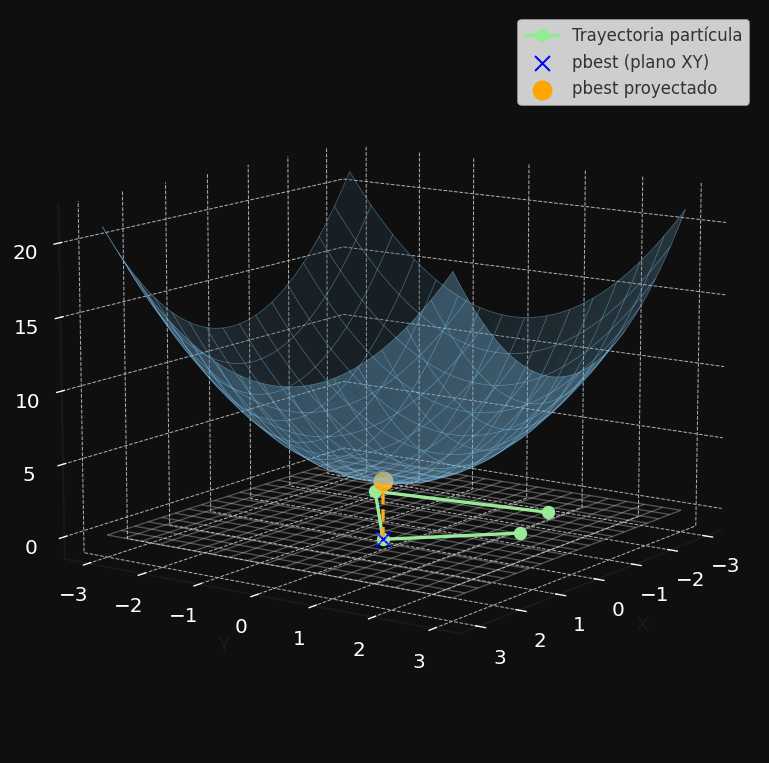

In [2]:
# inicializacion de pbest y gbest
pbest = particulas.copy()  # mejores posiciones personales iniciales

fitness_pbest = np.empty(num_particulas)  # mejores fitness personales iniciales
for i in range(num_particulas):
    fitness_pbest[i] = funcion_objetivo(particulas[i][0], particulas[i][1])

gbest = pbest[np.argmin(fitness_pbest)]  # mejor posicion global inicial
fitness_gbest = np.min(fitness_pbest)  # fitness global inicial

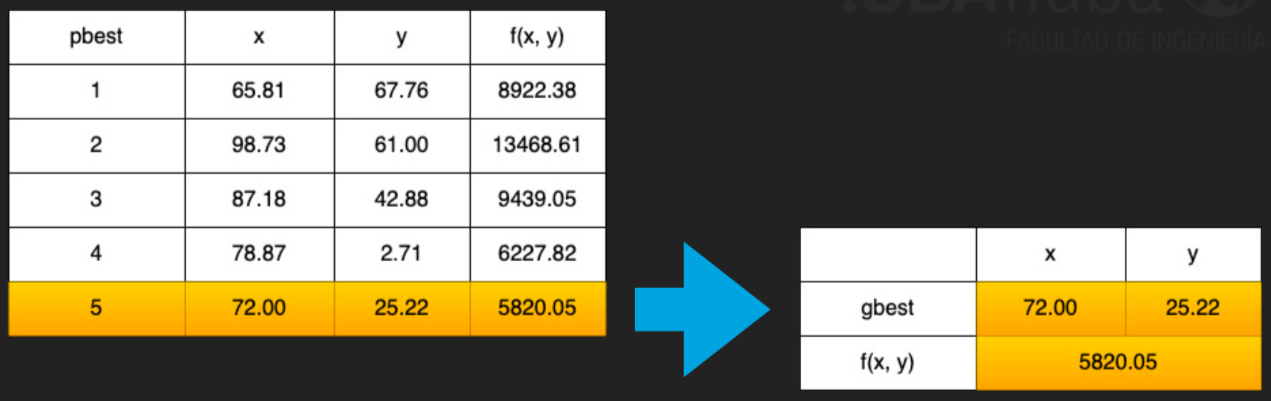

In [3]:
# busqueda
for iteracion in range(cantidad_iteraciones):
    for i in range(num_particulas):  # iteracion sobre cada partícula
        r1, r2 = np.random.rand(), np.random.rand()  # generacion dos numeros aleatorios

        # actualizacion de la velocidad de la particula en cada dimension
        for d in range(dim):
            velocidades[i][d] = (w * velocidades[i][d] + c1 * r1 * (pbest[i][d] - particulas[i][d]) + c2 * r2 * (gbest[d] - particulas[i][d]))

        for d in range(dim):
            particulas[i][d] = particulas[i][d] + velocidades[i][d]  # cctualizacion de la posicion de la particula en cada dimension

            # mantenimiento de las partículas dentro de los limites
            particulas[i][d] = np.clip(particulas[i][d], limite_inf, limite_sup)

        fitness = funcion_objetivo(particulas[i][0], particulas[i][1])  # Evaluacion de la funcion objetivo para la nueva posicion

        # actualizacion el mejor personal
        if fitness < fitness_pbest[i]:
            fitness_pbest[i] = fitness  # actualizacion del mejor fitness personal
            pbest[i] = particulas[i].copy()  # actualizacion de la mejor posicion personal

            # actualizacion del mejor global
            if fitness < fitness_gbest:
                fitness_gbest = fitness  # actualizacion del mejor fitness global
                gbest = particulas[i].copy()  # actualizacion de la mejor posicion global

    # imprimir el mejor global en cada iteracion
    print(f"Iteración {iteracion + 1}: Mejor posición global {gbest}, Valor {fitness_gbest}")

Iteración 1: Mejor posición global [  6.89367253 -15.15231858], Valor 277.1154792713743
Iteración 2: Mejor posición global [-7.96480668  7.83207283], Valor 124.77951017403689
Iteración 3: Mejor posición global [-7.96480668  7.83207283], Valor 124.77951017403689
Iteración 4: Mejor posición global [-4.08531116  1.83093084], Valor 20.042075033757456
Iteración 5: Mejor posición global [0.03491942 3.08669304], Valor 9.528893301752387
Iteración 6: Mejor posición global [0.03491942 3.08669304], Valor 9.528893301752387
Iteración 7: Mejor posición global [0.8005401 0.7433531], Valor 1.193438285826507
Iteración 8: Mejor posición global [0.8005401 0.7433531], Valor 1.193438285826507
Iteración 9: Mejor posición global [0.8005401 0.7433531], Valor 1.193438285826507
Iteración 10: Mejor posición global [0.89597333 0.40156629], Valor 0.9640236983626806


In [4]:
# resultado
solucion_optima = gbest  # mejor posicion global final
valor_optimo = fitness_gbest  # mejor fitness global final

print("\nSolucion optima (x, y):", solucion_optima)
print("Valor optimo:", valor_optimo)


Solucion optima (x, y): [0.89597333 0.40156629]
Valor optimo: 0.9640236983626806
